In [1]:
#Luís Filipe Silva Forti - 14592348
#Miguel Rodrigues Fonseca - 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from tabulate import tabulate
import seaborn as sns

In [27]:
#Abre o arquivo
df = pd.read_csv('./Video_Games_Sales_as_at_22_Dec_2016.csv')

#Remove linhas com dados inúteis
df = df[df.User_Score != "tbd"] #valores indefinidos
df = df[df.Critic_Score != "tbd"] #valores indefinidos
df = df.dropna() #Valores inválidos

#Remove 3 dados que estavam atrapalhando muito a visualização dos boxplots
df = df[df.NA_Sales < 41]
df = df[df.JP_Sales < 6.4]
df = df[df.Other_Sales < 10.5]

# Análise pela pontuação dos críticos

+-------------------+--------------------------+------------------------+--------------------------+------------------------+
| Região            |   Coeficiente de Pearson |   Valor de p (Pearson) |   Coeficiente de Kendall |   Valor de p (Kendall) |
+===================+==========================+========================+==========================+========================+
| América do Norte  |                 0.269524 |           7.33088e-114 |                 0.219327 |           9.08928e-156 |
+-------------------+--------------------------+------------------------+--------------------------+------------------------+
| Europa            |                 0.245257 |           5.28097e-94  |                 0.247378 |           1.5257e-192  |
+-------------------+--------------------------+------------------------+--------------------------+------------------------+
| Japão             |                 0.149347 |           2.52654e-35  |                 0.173338 |           3.17344

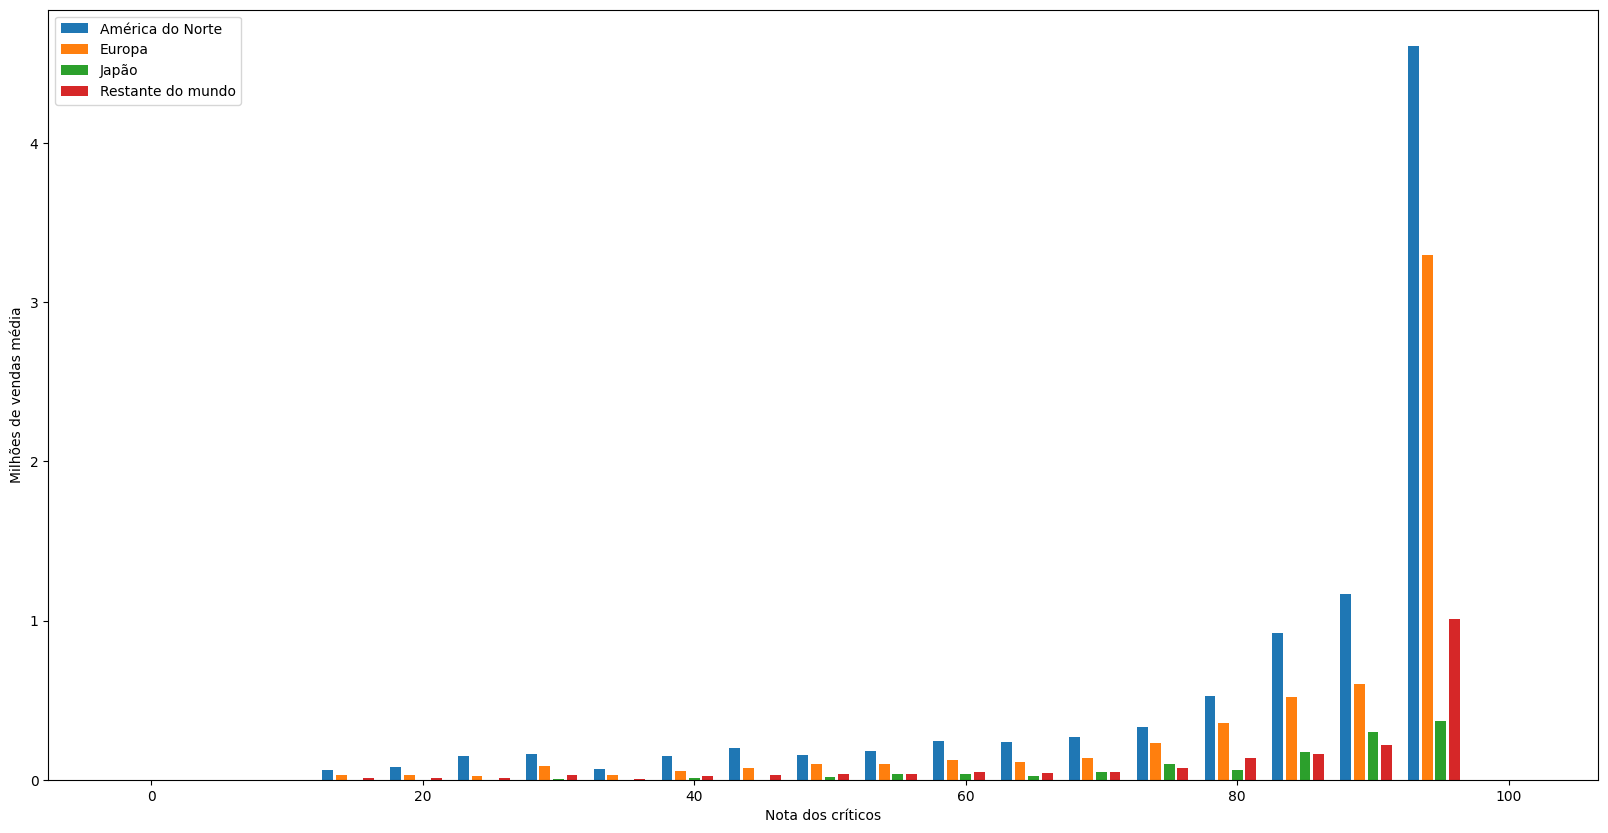

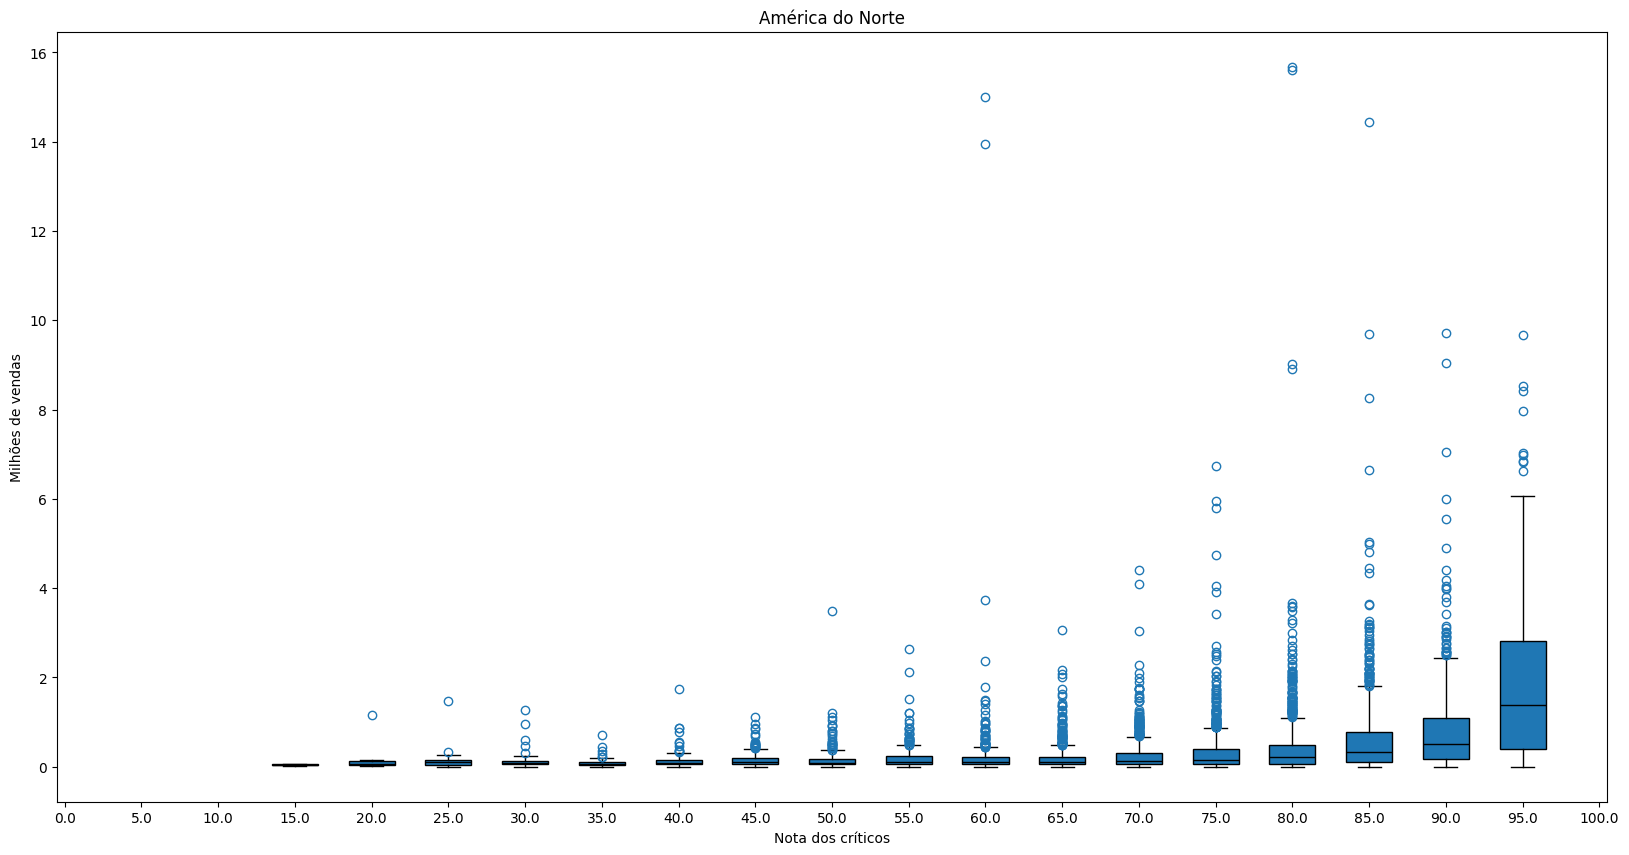

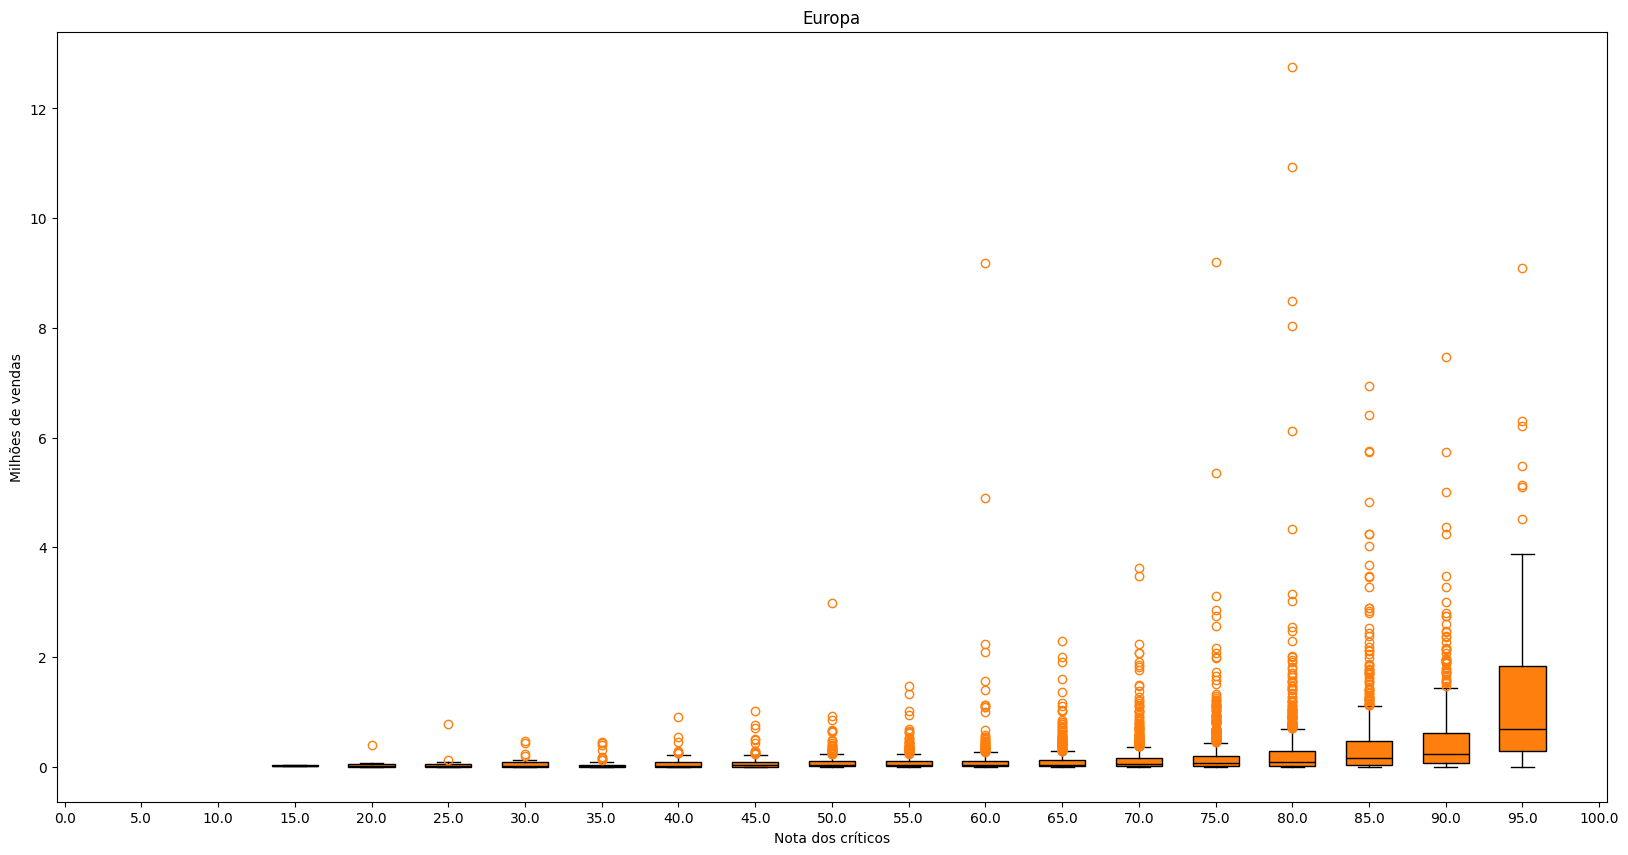

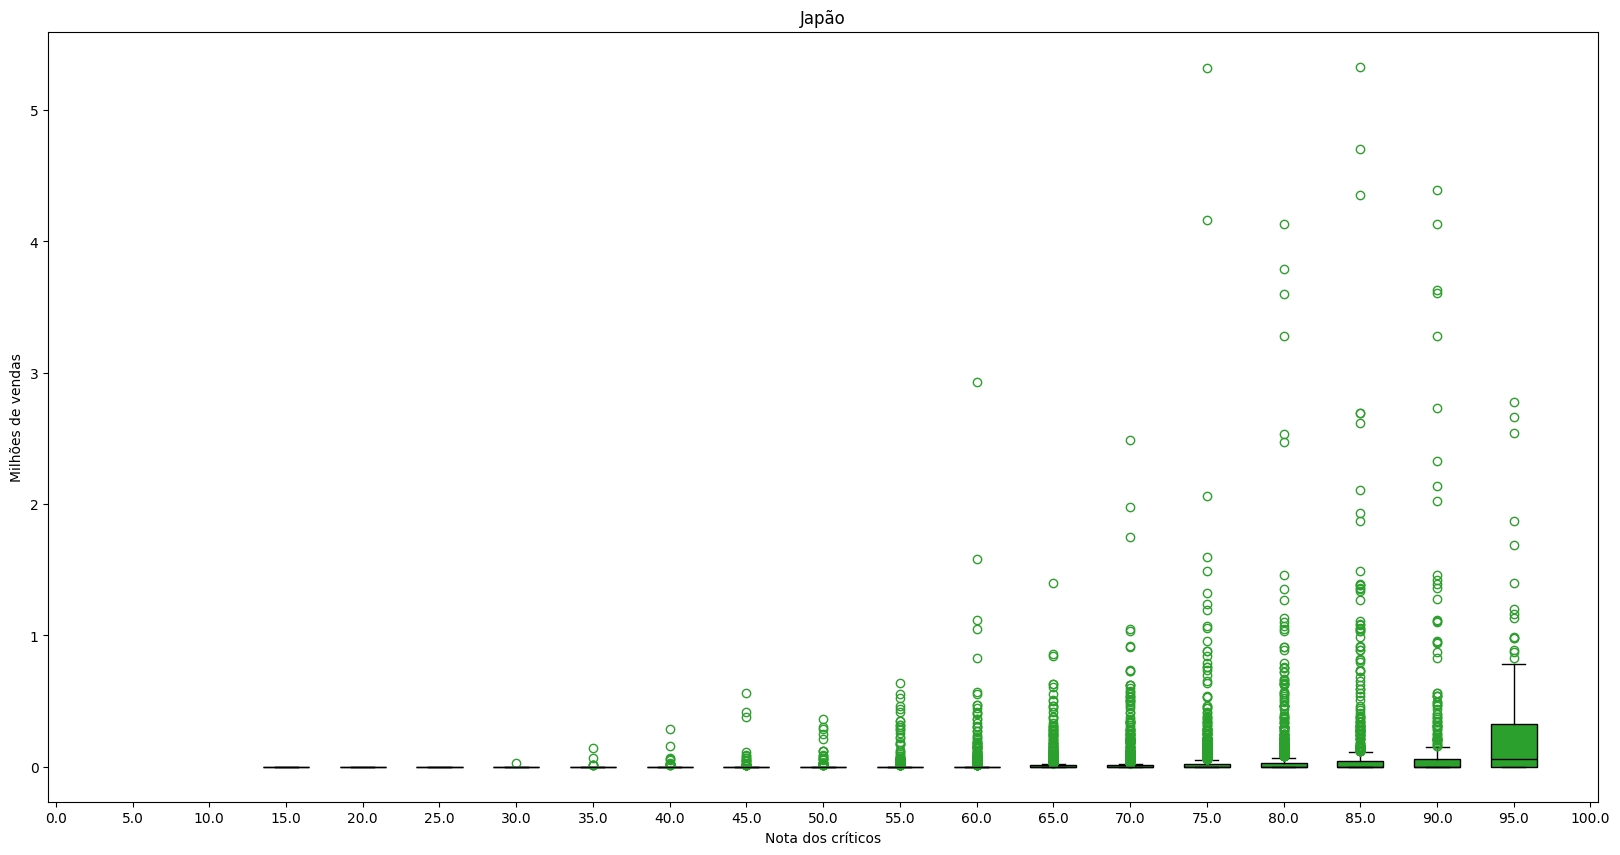

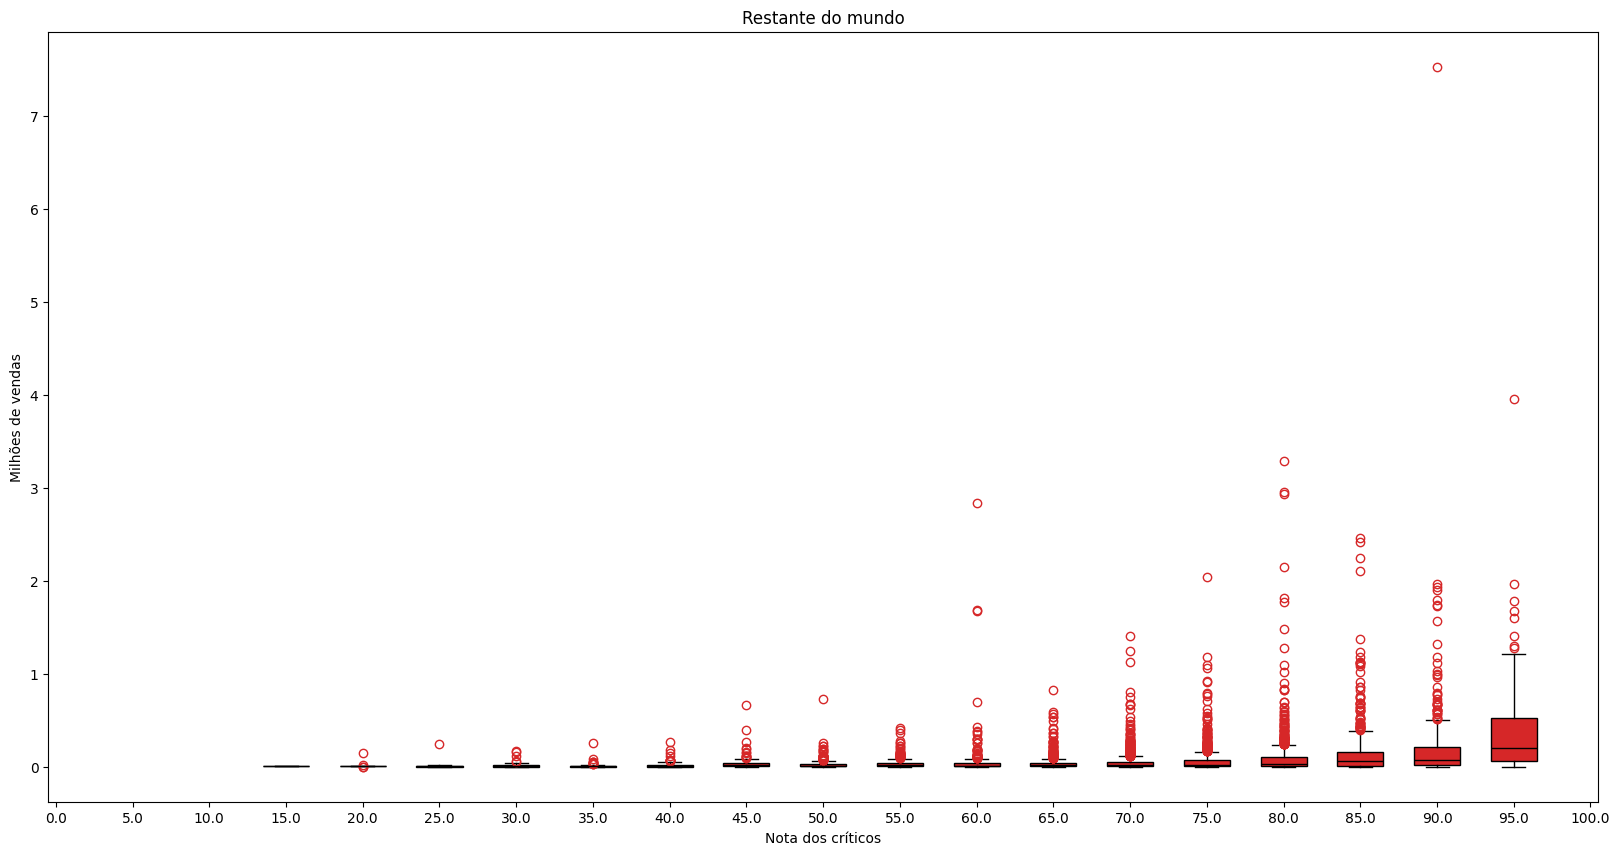

In [28]:
#Separa as colunas desejadas
pontCriticos = df.filter(['Name', 'Critic_Score', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)

#Ordena por pontuação dos críticos
pontCriticos = pontCriticos.sort_values("Critic_Score", ascending=True)
pontCriticos = pontCriticos.reset_index()

#Para calcular por pontuação
pontuacoes = pontCriticos.Critic_Score.unique()

#Para o gráfico ir de 0 a 100
x = np.linspace(0, 100, 21)

#Para salvar os valores do gráfico de médias
mediaVendasNA = np.zeros(x.size)
mediaVendasEU = np.zeros(x.size)
mediaVendasJP = np.zeros(x.size)
mediaVendasOutros = np.zeros(x.size)

#Para salvar os valores do boxplot
vendasNA = [[] for i in range(x.size)]
vendasEU = [[] for i in range(x.size)]
vendasJP = [[] for i in range(x.size)]
vendasOutros = [[] for i in range(x.size)]

#Pontuação atual
pos = 0
#Para cada pontuação possível
for i in range(0, x.size):
    #Se já considerou todas as pontuações coletadas
    if(x[i] >= float(pontuacoes[pontuacoes.size-1])):
        #Encerra o loop
        break
    
    #Para não ter complicações por ponto flutuante, usa essa comparação de diferença
    #Para facilitar a visualização, os dados são agrupados em janelas de 5, a mesma distância entre os valores de x
    while -2.5 <= x[i] - float(pontuacoes[pos]) and x[i] - float(pontuacoes[pos]) < 2.5 and pos < pontuacoes.size-1:
        #Dados para cada região
        valNA = pontCriticos[pontCriticos.Critic_Score == pontuacoes[pos]].NA_Sales
        valEU = pontCriticos[pontCriticos.Critic_Score == pontuacoes[pos]].EU_Sales
        valJP = pontCriticos[pontCriticos.Critic_Score == pontuacoes[pos]].JP_Sales
        valOutros = pontCriticos[pontCriticos.Critic_Score == pontuacoes[pos]].Other_Sales
        
        #Calcula a média de cada região
        mediaVendasNA[i] = np.sum(valNA)/valNA.size
        mediaVendasEU[i] = np.sum(valEU)/valEU.size
        mediaVendasJP[i] = np.sum(valJP)/valJP.size
        mediaVendasOutros[i] = np.sum(valOutros)/valOutros.size

        #Salva os dados de cada região
        vendasNA[i] += list(valNA.values.astype(float))
        vendasEU[i] += list(valEU.values.astype(float))
        vendasJP[i] += list(valJP.values.astype(float))
        vendasOutros[i] += list(valOutros.values.astype(float))
        
        #Avança pra próxima pontuação
        pos += 1

#Calcula os coeficiente de Pearson e Kendall
valoresPearsonKendall = [
    ["América do Norte"] + list(stats.pearsonr(pontCriticos.Critic_Score, pontCriticos.NA_Sales)) + list(stats.kendalltau(pontCriticos.Critic_Score, pontCriticos.NA_Sales)),
    ["Europa"] + list(stats.pearsonr(pontCriticos.Critic_Score, pontCriticos.EU_Sales)) + list(stats.kendalltau(pontCriticos.Critic_Score, pontCriticos.EU_Sales)),
    ["Japão"] + list(stats.pearsonr(pontCriticos.Critic_Score, pontCriticos.JP_Sales)) + list(stats.kendalltau(pontCriticos.Critic_Score, pontCriticos.JP_Sales)),
    ["Restante do mundo"] + list(stats.pearsonr(pontCriticos.Critic_Score, pontCriticos.Other_Sales)) + list(stats.kendalltau(pontCriticos.Critic_Score, pontCriticos.Other_Sales))
]

#Imprime a tabela dos coeficientes
print(tabulate(valoresPearsonKendall, headers=["Região", "Coeficiente de Pearson", "Valor de p (Pearson)", "Coeficiente de Kendall", "Valor de p (Kendall)"], tablefmt="grid"))

#Plota o gráfico de médias
plt.figure(figsize=(20, 10))
#Valores levemente deslocados em x para visualização no gráfico
plt.bar(x-2, mediaVendasNA, label="América do Norte")
plt.bar(x-1, mediaVendasEU, label="Europa")
plt.bar(x, mediaVendasJP, label="Japão")
plt.bar(x+1, mediaVendasOutros, label="Restante do mundo")
plt.xlabel("Nota dos críticos")
plt.ylabel("Milhões de vendas média")
plt.legend()
plt.show()

#Boxplot das vendas NA
fig = plt.figure(figsize = (20, 10))
plt.boxplot(vendasNA, positions = x, widths=np.ones(x.size)*3, patch_artist=True, 
            boxprops=dict(facecolor="tab:blue", color="black"),
            capprops=dict(color="black"),
            whiskerprops=dict(color="black"),
            flierprops=dict(color="tab:blue", markeredgecolor="tab:blue"),
            medianprops=dict(color="black"),
            )

plt.xlabel("Nota dos críticos")
plt.ylabel("Milhões de vendas")
plt.title("América do Norte")
plt.show()

#Boxplot das vendas EU
fig = plt.figure(figsize = (20, 10))
plt.boxplot(vendasEU, positions = x, widths=np.ones(x.size)*3, patch_artist=True, 
            boxprops=dict(facecolor="tab:orange", color="black"),
            capprops=dict(color="black"),
            whiskerprops=dict(color="black"),
            flierprops=dict(color="tab:orange", markeredgecolor="tab:orange"),
            medianprops=dict(color="black"),
            )
plt.xlabel("Nota dos críticos")
plt.ylabel("Milhões de vendas")
plt.title("Europa")
plt.show()

#Boxplot das vendas JP
fig = plt.figure(figsize = (20, 10))
plt.boxplot(vendasJP, positions = x, widths=np.ones(x.size)*3, patch_artist=True, 
            boxprops=dict(facecolor="tab:green", color="black"),
            capprops=dict(color="black"),
            whiskerprops=dict(color="black"),
            flierprops=dict(color="tab:green", markeredgecolor="tab:green"),
            medianprops=dict(color="black"),
            )
plt.xlabel("Nota dos críticos")
plt.ylabel("Milhões de vendas")
plt.title("Japão")
plt.show()

#Boxplot das vendas Outros
fig = plt.figure(figsize = (20, 10))
plt.boxplot(vendasOutros, positions = x, widths=np.ones(x.size)*3, patch_artist=True, 
            boxprops=dict(facecolor="tab:red", color="black"),
            capprops=dict(color="black"),
            whiskerprops=dict(color="black"),
            flierprops=dict(color="tab:red", markeredgecolor="tab:red"),
            medianprops=dict(color="black"),
            )
plt.xlabel("Nota dos críticos")
plt.ylabel("Milhões de vendas")
plt.title("Restante do mundo")
plt.show()

# Análise pela pontuação dos usuários

+-------------------+--------------------------+------------------------+--------------------------+------------------------+
| Região            |   Coeficiente de Pearson |   Valor de p (Pearson) |   Coeficiente de Kendall |   Valor de p (Kendall) |
+===================+==========================+========================+==========================+========================+
| América do Norte  |                0.0941167 |            6.72869e-15 |                0.087911  |            1.83295e-26 |
+-------------------+--------------------------+------------------------+--------------------------+------------------------+
| Europa            |                0.0597539 |            7.85615e-07 |                0.0869413 |            2.72752e-25 |
+-------------------+--------------------------+------------------------+--------------------------+------------------------+
| Japão             |                0.129782  |            5.14859e-27 |                0.140418  |            3.4054

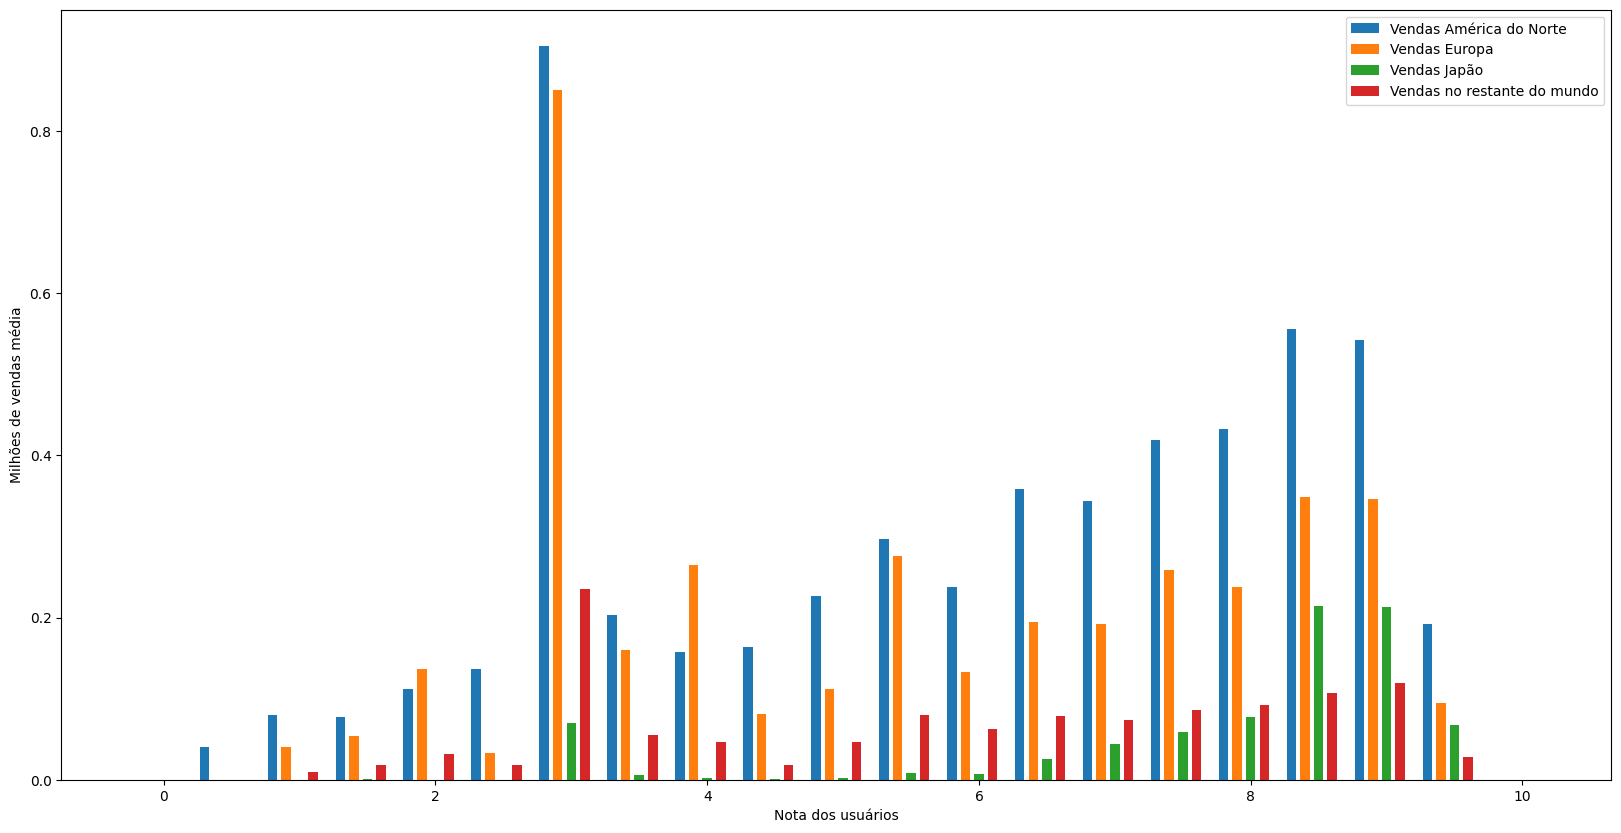

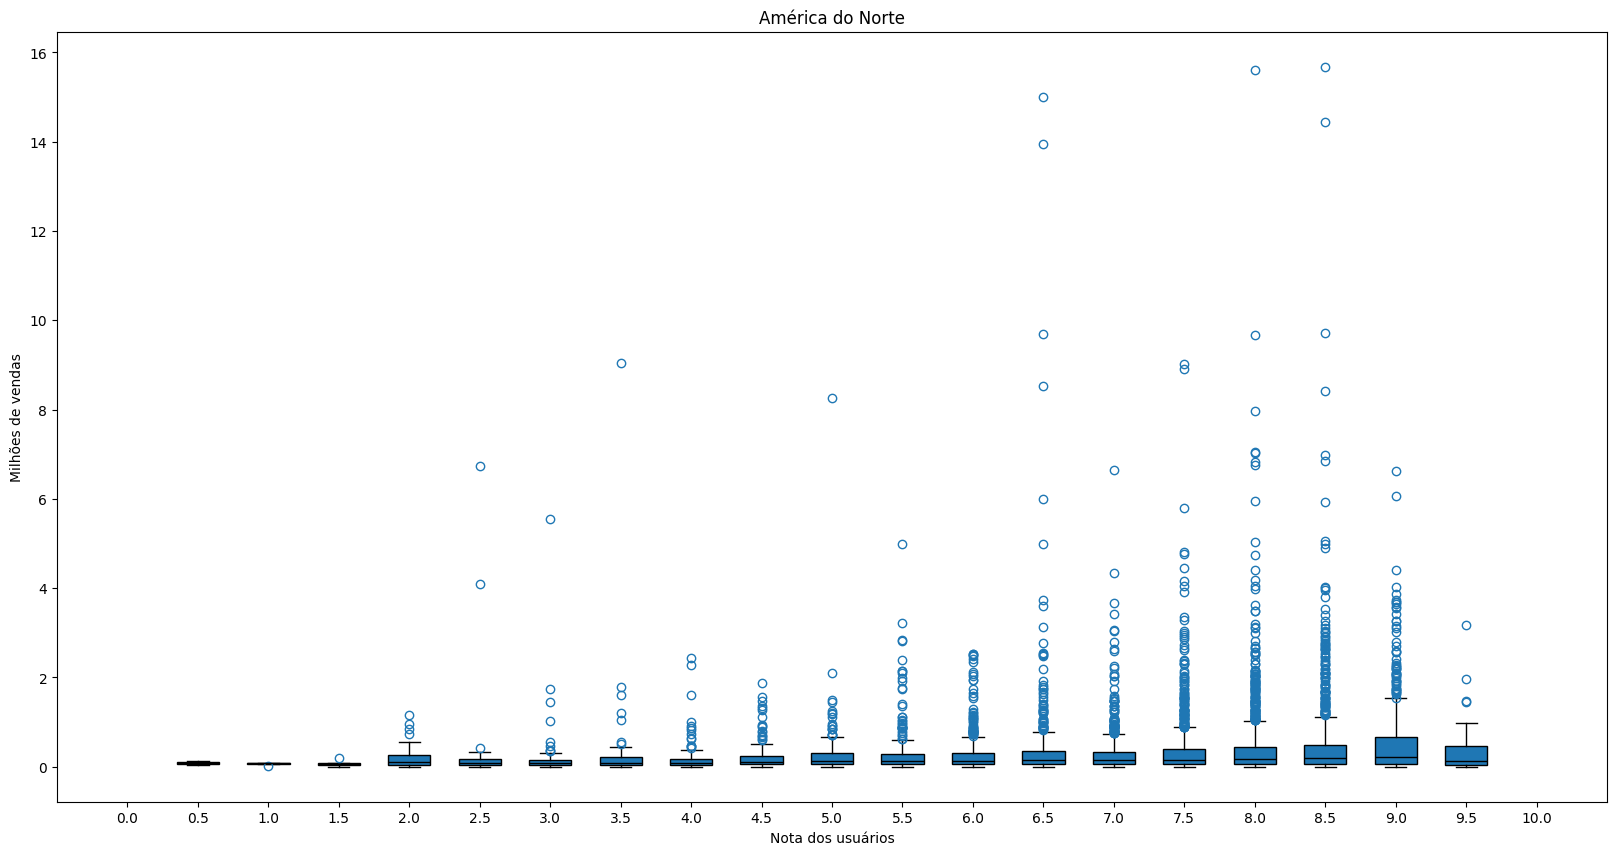

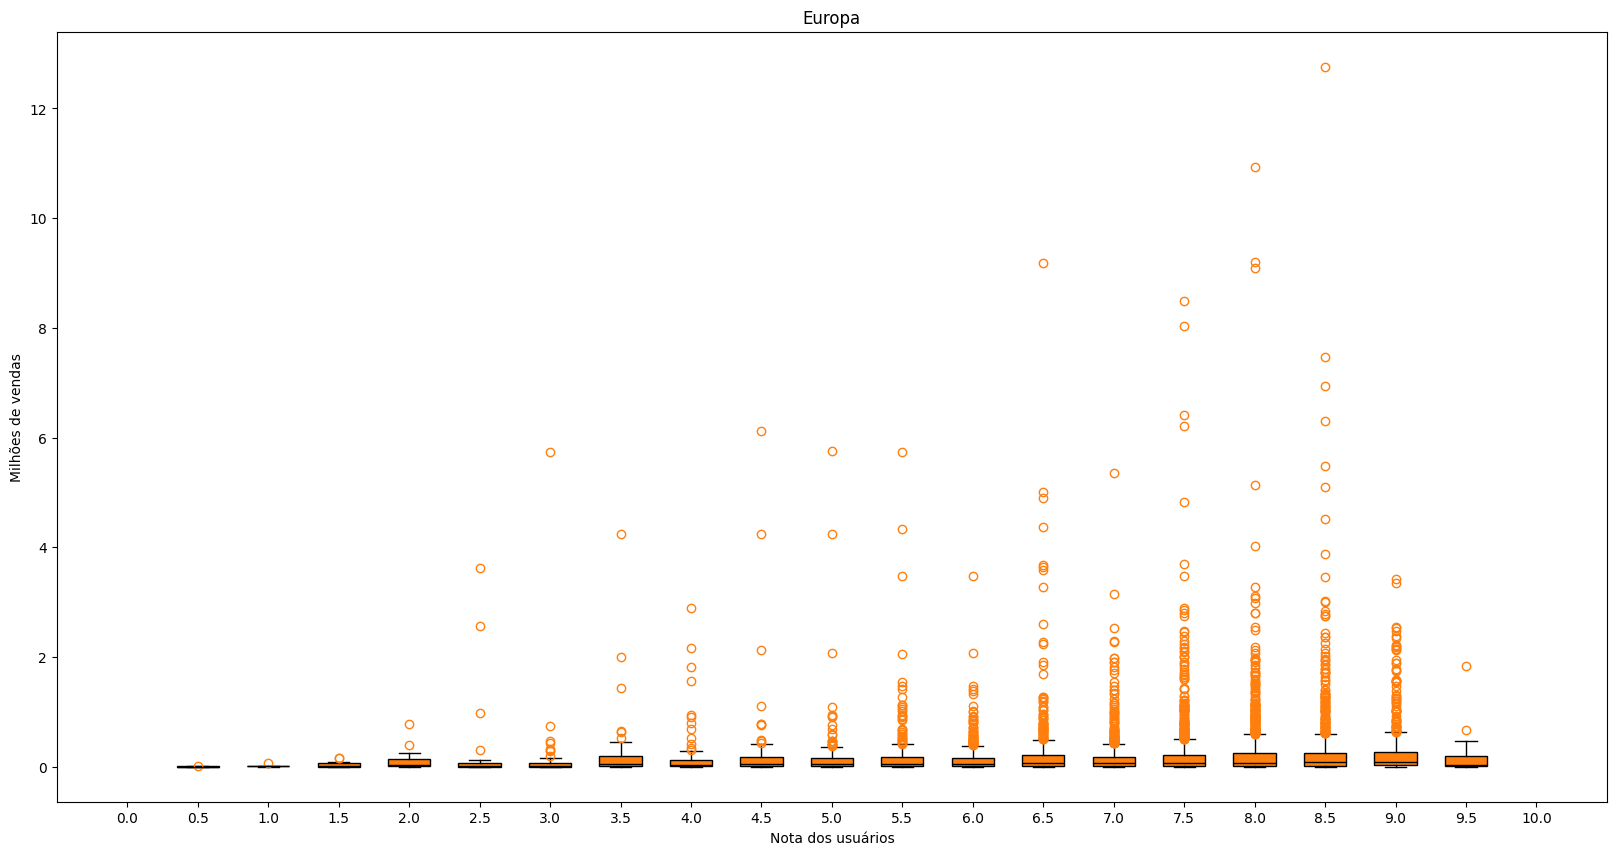

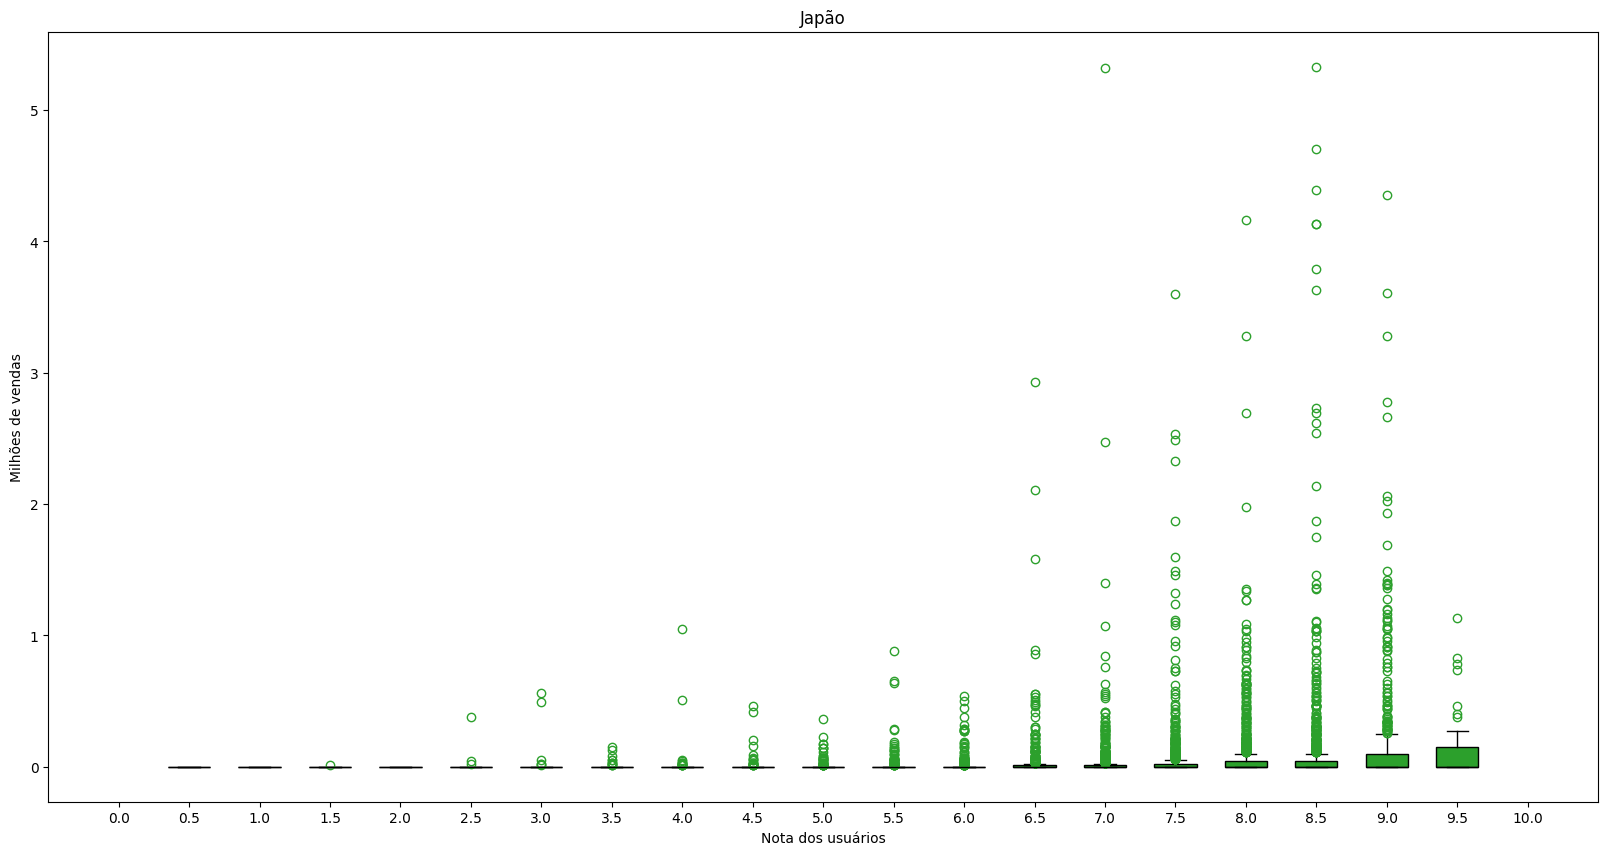

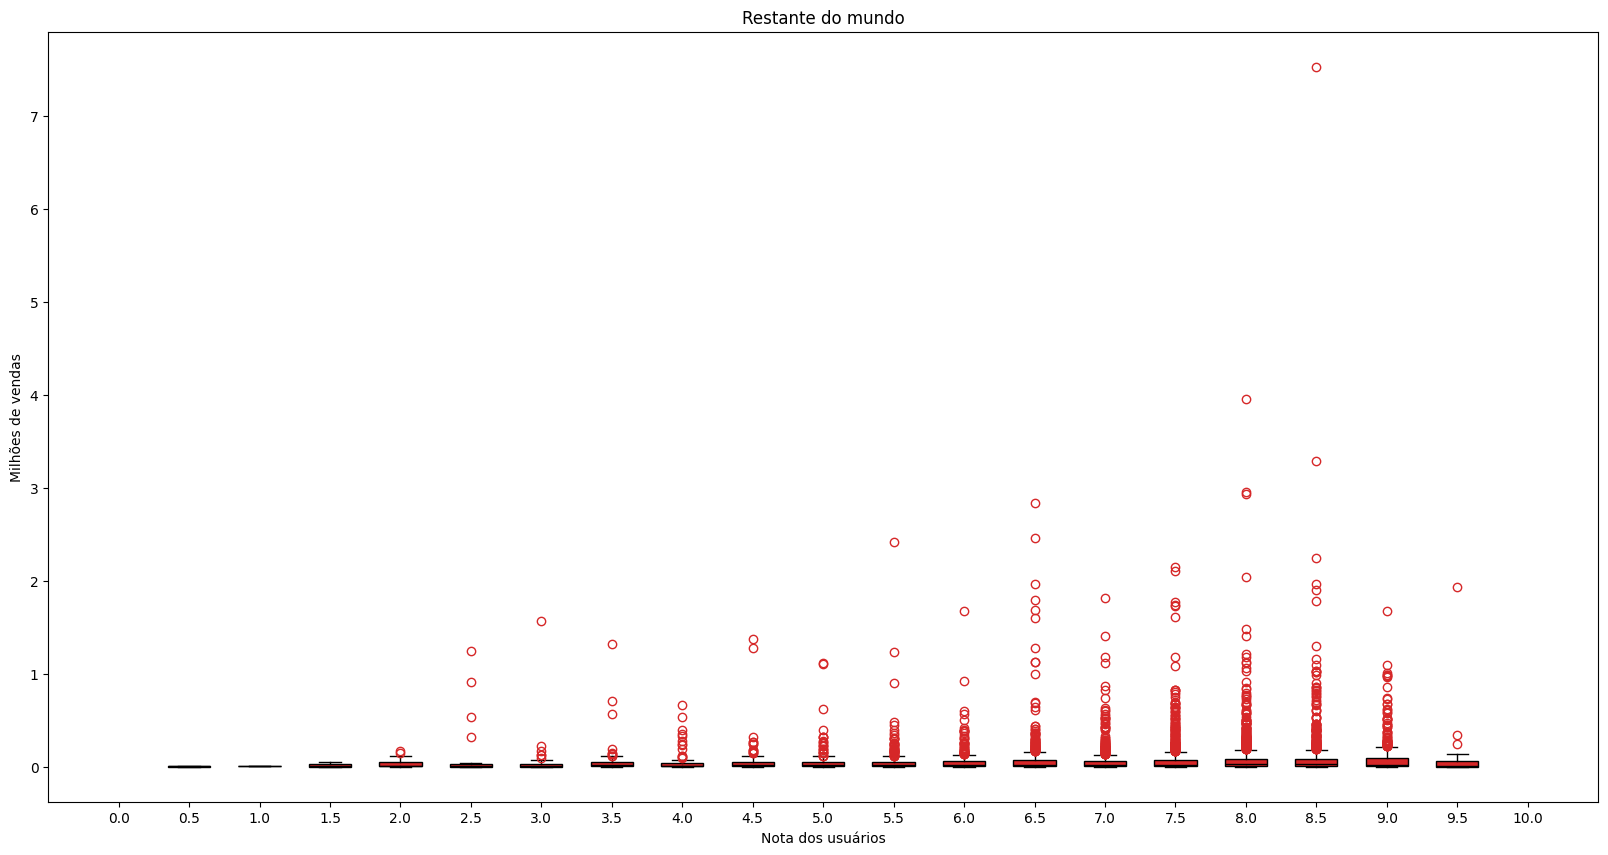

In [5]:
#Separa as colunas desejadas
pontUsuarios = df.filter(['Name', 'User_Score', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)
#Ordena por pontuação
pontUsuarios = pontUsuarios.sort_values("User_Score", ascending=True)
pontUsuarios = pontUsuarios.reset_index()

#Para calcular por pontuação
pontuacoes = pontUsuarios.User_Score.unique()

#Para o gráfico ir de 0 a 10
x = np.linspace(0, 10, 21)

#Para salvar os valores do gráfico de médias
mediaVendasNA = np.zeros(x.size)
mediaVendasEU = np.zeros(x.size)
mediaVendasJP = np.zeros(x.size)
mediaVendasOutros = np.zeros(x.size)

#Para salvar os valores do boxplot
vendasNA = [[] for i in range(x.size)]
vendasEU = [[] for i in range(x.size)]
vendasJP = [[] for i in range(x.size)]
vendasOutros = [[] for i in range(x.size)]

#Pontuação atual
pos = 0
#Para cada pontuação possível
for i in range(0, x.size):
    #Se já considerou todas as pontuações coletadas
    if(x[i] >= float(pontuacoes[pontuacoes.size-1])):
        #Encerra o loop
        break
    
    #Para não ter complicações por ponto flutuante, usa essa comparação de diferença
    #Para facilitar a visualização, os dados são agrupados em janelas de 0.5, a mesma distância entre os valores de x
    while -0.25 <= x[i] - float(pontuacoes[pos]) and x[i] - float(pontuacoes[pos]) < 0.25 and pos < pontuacoes.size-1:
        #Dados para cada região
        valNA = pontUsuarios[pontUsuarios.User_Score == pontuacoes[pos]].NA_Sales
        valEU = pontUsuarios[pontUsuarios.User_Score == pontuacoes[pos]].EU_Sales
        valJP = pontUsuarios[pontUsuarios.User_Score == pontuacoes[pos]].JP_Sales
        valOutros = pontUsuarios[pontUsuarios.User_Score == pontuacoes[pos]].Other_Sales
        
        #Salva a média de cada região
        mediaVendasNA[i] = np.sum(valNA)/valNA.size
        mediaVendasEU[i] = np.sum(valEU)/valEU.size
        mediaVendasJP[i] = np.sum(valJP)/valJP.size
        mediaVendasOutros[i] = np.sum(valOutros)/valOutros.size

        #Salva os dados de cada região
        vendasNA[i] += list(valNA.values.astype(float))
        vendasEU[i] += list(valEU.values.astype(float))
        vendasJP[i] += list(valJP.values.astype(float))
        vendasOutros[i] += list(valOutros.values.astype(float))
        
        #Avança pra próxima pontuação coletada
        pos += 1

        #Calcula os coeficiente de Peasron e Kendall
valoresPearsonKendall = [
    ["América do Norte"] + list(stats.pearsonr(pontUsuarios.User_Score, pontUsuarios.NA_Sales)) + list(stats.kendalltau(pontUsuarios.User_Score, pontUsuarios.NA_Sales)),
    ["Europa"] + list(stats.pearsonr(pontUsuarios.User_Score, pontUsuarios.EU_Sales)) + list(stats.kendalltau(pontUsuarios.User_Score, pontUsuarios.EU_Sales)),
    ["Japão"] + list(stats.pearsonr(pontUsuarios.User_Score, pontUsuarios.JP_Sales)) + list(stats.kendalltau(pontUsuarios.User_Score, pontUsuarios.JP_Sales)),
    ["Restante do mundo"] + list(stats.pearsonr(pontUsuarios.User_Score, pontUsuarios.Other_Sales)) + list(stats.kendalltau(pontUsuarios.User_Score, pontUsuarios.Other_Sales))
]

#Imprime a tabela dos coeficientes
print(tabulate(valoresPearsonKendall, headers=["Região", "Coeficiente de Pearson", "Valor de p (Pearson)", "Coeficiente de Kendall", "Valor de p (Kendall)"], tablefmt="grid"))

#Plota o gráfico
plt.figure(figsize=(20, 10))
#Valores levemente deslocados em x para visualização no gráfico
plt.bar(x-0.2, mediaVendasNA, width=0.07, label="Vendas América do Norte")
plt.bar(x-0.1, mediaVendasEU, width=0.07, label="Vendas Europa")
plt.bar(x, mediaVendasJP, width=0.07, label="Vendas Japão")
plt.bar(x+0.1, mediaVendasOutros, width=0.07, label="Vendas no restante do mundo")
plt.xlabel("Nota dos usuários")
plt.ylabel("Milhões de vendas média")
plt.legend()
plt.show()

#Boxplot vendas NA
fig = plt.figure(figsize = (20, 10))
plt.boxplot(vendasNA, positions = x, widths=np.ones(x.size)*0.3, patch_artist=True, 
            boxprops=dict(facecolor="tab:blue", color="black"),
            capprops=dict(color="black"),
            whiskerprops=dict(color="black"),
            flierprops=dict(color="tab:blue", markeredgecolor="tab:blue"),
            medianprops=dict(color="black"),
            )

plt.xlabel("Nota dos usuários")
plt.ylabel("Milhões de vendas")
plt.title("América do Norte")
plt.show()

#Boxplot vendas EU
fig = plt.figure(figsize = (20, 10))
plt.boxplot(vendasEU, positions = x, widths=np.ones(x.size)*0.3, patch_artist=True, 
            boxprops=dict(facecolor="tab:orange", color="black"),
            capprops=dict(color="black"),
            whiskerprops=dict(color="black"),
            flierprops=dict(color="tab:orange", markeredgecolor="tab:orange"),
            medianprops=dict(color="black"),
            )
plt.xlabel("Nota dos usuários")
plt.ylabel("Milhões de vendas")
plt.title("Europa")
plt.show()

#Boxplot vendas JP
fig = plt.figure(figsize = (20, 10))
plt.boxplot(vendasJP, positions = x, widths=np.ones(x.size)*0.3, patch_artist=True, 
            boxprops=dict(facecolor="tab:green", color="black"),
            capprops=dict(color="black"),
            whiskerprops=dict(color="black"),
            flierprops=dict(color="tab:green", markeredgecolor="tab:green"),
            medianprops=dict(color="black"),
            )
plt.xlabel("Nota dos usuários")
plt.ylabel("Milhões de vendas")
plt.title("Japão")
plt.show()

#Boxplot vendas Outros
fig = plt.figure(figsize = (20, 10))
plt.boxplot(vendasOutros, positions = x, widths=np.ones(x.size)*0.3, patch_artist=True, 
            boxprops=dict(facecolor="tab:red", color="black"),
            capprops=dict(color="black"),
            whiskerprops=dict(color="black"),
            flierprops=dict(color="tab:red", markeredgecolor="tab:red"),
            medianprops=dict(color="black"),
            )
plt.xlabel("Nota dos usuários")
plt.ylabel("Milhões de vendas")
plt.title("Restante do mundo")
plt.show()

# Análise pela pontuação geral

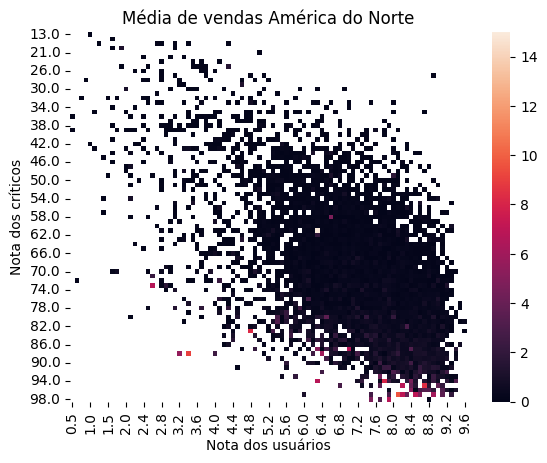

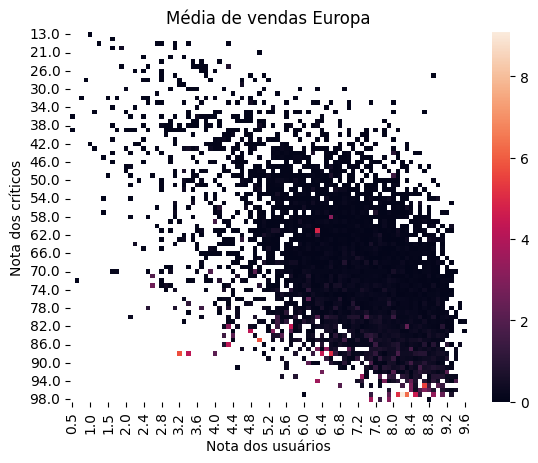

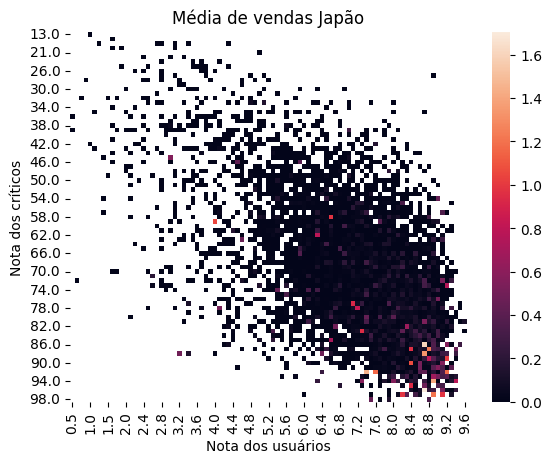

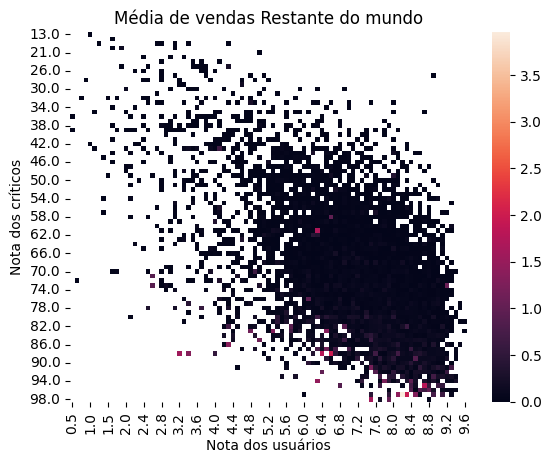

In [11]:
#Pega todas as colunas relevantes
pontGeral = df.filter(['Name', 'Critic_Score', 'User_Score', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)
#Ordena por nota dos usuários
pontGeral = pontGeral.sort_values("User_Score", ascending=True)
pontGeral = pontGeral.reset_index()

#Calcula a média de linhas com notas repetidas
pontGeral = pontGeral.groupby(['User_Score', 'Critic_Score']).agg({"NA_Sales":"mean", "EU_Sales":"mean", "JP_Sales":"mean", "Other_Sales":"mean"}).reset_index()

#Heatmap vendas NA
data_pivoted = pontGeral.pivot(index="Critic_Score", columns="User_Score", values="NA_Sales")
ax = sns.heatmap(data_pivoted)
plt.title("Média de vendas América do Norte")
plt.xlabel("Nota dos usuários")
plt.ylabel("Nota dos críticos")
plt.show()

#Heatmap vendas EU
data_pivoted = pontGeral.pivot(index="Critic_Score", columns="User_Score", values="EU_Sales")
ax = sns.heatmap(data_pivoted)
plt.title("Média de vendas Europa")
plt.xlabel("Nota dos usuários")
plt.ylabel("Nota dos críticos")
plt.show()

#Heatmap vendas JP
data_pivoted = pontGeral.pivot(index="Critic_Score", columns="User_Score", values="JP_Sales")
ax = sns.heatmap(data_pivoted)
plt.title("Média de vendas Japão")
plt.xlabel("Nota dos usuários")
plt.ylabel("Nota dos críticos")
plt.show()

#Heatmap vendas Outros
data_pivoted = pontGeral.pivot(index="Critic_Score", columns="User_Score", values="Other_Sales")
ax = sns.heatmap(data_pivoted)
plt.title("Média de vendas Restante do mundo")
plt.xlabel("Nota dos usuários")
plt.ylabel("Nota dos críticos")
plt.show()